# Learning from Experts

In [1]:
import learner
from dirichlet import Dirichlet
import numpy as np
%matplotlib inline

Learn concepts from expert

In [2]:
# New learner with 2 datasets per concept required
l = learner.learner(20)

while (l.learningDone() == False):
    l.learn()


============Nest Dataset===============

Please label this unknown dataset for this probability vector: [0.7742255886384569, 0.2171848975517633, 0.008589513809779807]
The following concepts exist already: 
0: none of the other ones
1: sure about one, Number of datasets for this concept: 0
2: sure about two, Number of datasets for this concept: 0
3: unsure, Number of datasets for this concept: 0


KeyboardInterrupt: 

Use mle to generate a Dirichlet distribution from the learned data

In [ ]:
d = Dirichlet([1, 1 ,1])

distributions = []
concepts = l.getConcepts()
alphas = []
for t in range(0,3):    
    data = l.getDistribution()[t]
    data = np.array(data)
    alphas.append(d.mle(data))
    out = str(concepts[t] + ": " + str(alphas[t]))
    print(out)
    distributions.append(Dirichlet(alphas[t]))
    
c = 2
Dirichlet.draw_pdf_contours(distributions[c])
print("Concept: " + concepts[c] + " with alpha = " + str(alphas[t]))

# Probability Explanation

Using Dirichlet function to explain concepts based on probabilities

In [3]:
import numpy as np
# Creates a class Dirichlet from alpha parameters with a probability density function
from dirichlet import Dirichlet
from dirichlet import helper


%matplotlib inline

Sample the regions for the classifier as Dirichlet distribution

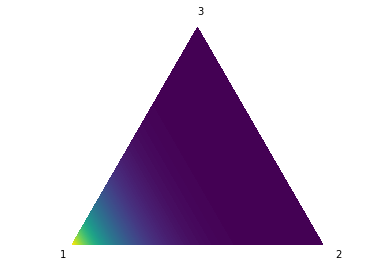

In [4]:
# TODO learn these form experts
alpha_sure_about_1 = [6, 1, 1]
alpha_sure_about_2 = [6, 6, 1]
alpha_unsure = [6,6,6]

D_sure_about_1 = Dirichlet(alpha_sure_about_1, )
D_sure_about_2 = Dirichlet(alpha_sure_about_2)
D_unsure = Dirichlet(alpha_unsure)
print(D_sure_about_2)
Dirichlet.draw_pdf_contours(D_sure_about_1)


Spit out random generated probability

In [5]:
import random
raw = [random.random(), random.random(), random.random()]
# For thesis plot 
sample = helper.normalize(raw)
sample = [0.13178294573643412, 0.6976744186046512, 0.17054263565891473]
print(sample)

[0.13178294573643412, 0.6976744186046512, 0.17054263565891473]


Sort the sample in order to have universal concepts

Get the value of the dirichlet distribution at the position of the sample

Biggest value is the most fitting concept

In [6]:
sample.sort(reverse=True)
print(sample)
sure_1_certainty = Dirichlet.pdf(D_sure_about_1, sample)
#print(sure_1_certainty)
sure_2_certainty = Dirichlet.pdf(D_sure_about_2, sample)
unsure_certainty = Dirichlet.pdf(D_unsure, sample)

#sure_1_certainty = Dirichlet.pdf(Dirichlet(alphas[0]),sample)
#sure_2_certainty = Dirichlet.pdf(Dirichlet(alphas[1]),sample)
#unsure_certainty = Dirichlet.pdf(Dirichlet(alphas[2]),sample)



normalized_certainties = helper.normalize([sure_1_certainty, sure_2_certainty, unsure_certainty])

out = "Sure about 1 with: " + str(round(normalized_certainties[0],4)*100) + "% certainty, raw: " + str(sure_1_certainty)
print(out)
out = "Sure about 2 with: " + str(round(normalized_certainties[1],4)*100) + "% certainty, raw: " + str(sure_2_certainty)
print(out)
out = "No clue          : " + str(round(normalized_certainties[2],4)*100) + "% certainty, raw: " + str(unsure_certainty)
print(out)
print(sum(normalized_certainties))



[0.6976744186046512, 0.17054263565891473, 0.13178294573643412]
Sure about 1 with: 87.53999999999999% certainty, raw: 6.942458400161412
Sure about 2 with: 10.0% certainty, raw: 0.7932376519246177
No clue          : 2.46% certainty, raw: 0.1950965909387602
0.9999999999999999


- How can we increase the concepts to multiple classes judging on 1? - Scale up
- Make Multiple dimensions
- Conepts we didnt think about, possibility to create a new class or handle unclassifyable
- Print decision boundaries